In [2]:
import numpy as np
import networkx as nx
import scipy as sp
from numpy import linalg as LA
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [3]:
n=4
G2 = nx.read_graph6('/Users/s.b.szkudlarek/Documents/1 - Study/MSc/MSc Thesis/Code/Entropy sepctrum all + data/graph4.g6')
G2L = [None]*len(G2)
for i in range(len(G2)):
    G2L[i]=nx.to_numpy_array(G2[i])
print(len(G2))

11


<class 'networkx.utils.decorators.argmap'> compilation 13:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/var/folders/m0/qcd3yywj63v1vs996wmk316c0000gn/T/ipykernel_10201/2299124830.py:17: RuntimeWarning: invalid value encountered in log
  vne += -RHO[i][p][q]*np.log(RHO[i][p][q])
/Users/s.b.szkudlarek/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/m0/qcd3yywj63v1vs996wmk316c0000gn/T/ipykernel_10201/2299124830.py:17: RuntimeWarning: divide by zero encountered in log
  vne += -RHO[i][p][q]*np.log(RHO[i][p][q])
/var/folders/m0/qcd3yywj63v1vs996wmk316c0000gn/T/ipykernel_10201/2299124830.py:17: RuntimeWarning: invalid value encountered in double_scalars
  vne += -RHO[i][p][q]*np.log(RHO[i][p][q])
/var/folders/m0/qcd3yywj63v1vs996wmk316c0000gn/T/ipykernel_10201/2299124830.py:17: RuntimeWar

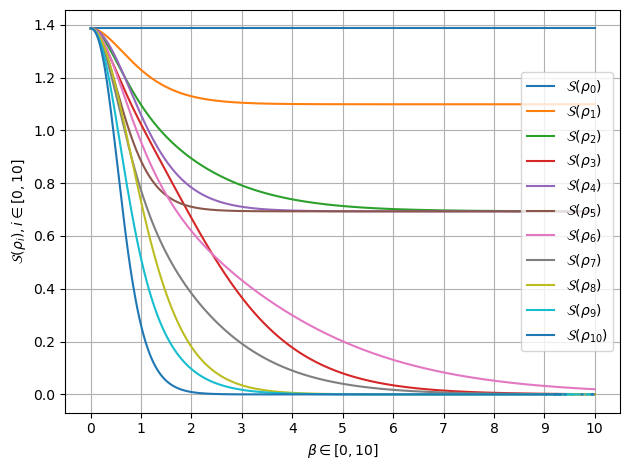

In [4]:
##
#note that the index in the legend is not yet correct 

RHO=[None]*(len(G2))
VNE=[None]*(len(G2))
for i in range(len(G2)):
    RHO[i]=[]
    VNE[i]=[]
    beta = np.linspace(0,10,1000)
    for j in range(len(beta)):
        partition_func = np.sum(LA.eigvals(expm(-beta[j]*sp.sparse.csr_matrix.toarray(nx.laplacian_matrix(nx.from_numpy_matrix(G2L[i]))))))
        RHO[i].append(expm(-beta[j]*sp.sparse.csr_matrix.toarray(nx.laplacian_matrix(nx.from_numpy_matrix(G2L[i]))))/partition_func)
    for p in range(len(beta)):
        vne=0
        RHO[i][p] = LA.eigvals(RHO[i][p])
        for q in range(n):
            vne += -RHO[i][p][q]*np.log(RHO[i][p][q])
        VNE[i].append(vne)
    plt.plot(beta,VNE[i],label=(r'$\mathcal{S}(\rho_{{{%i}}})$' % i))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel(r'$\beta \in [0,10]$')
plt.ylabel(r'$\mathcal{S}(\rho_{{{i}}}), i \in [0,10]$')
plt.legend(loc='center right')
plt.grid()

plt.tight_layout()
plt.show()

0
1
2
3
4
5
6
7
8
9
10


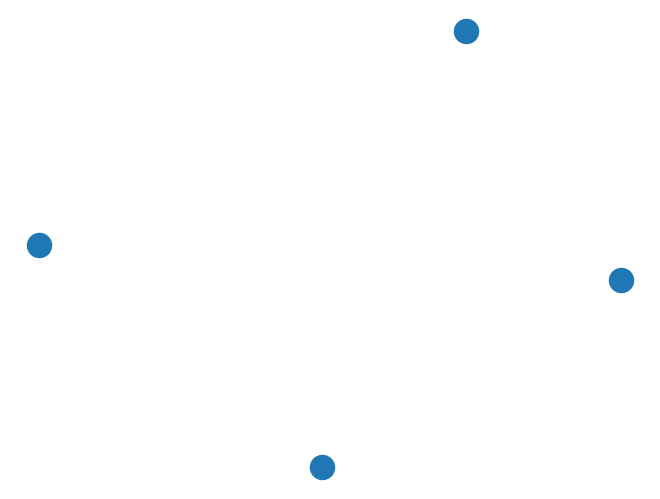

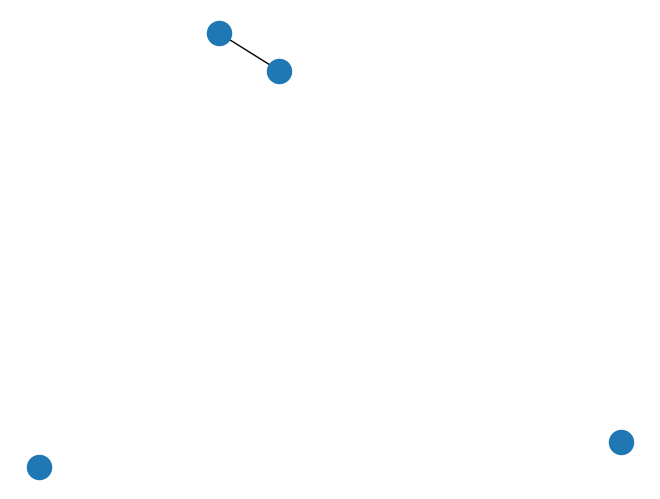

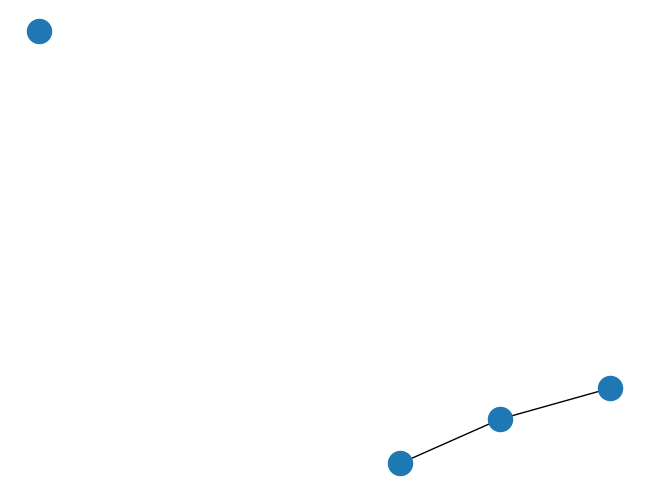

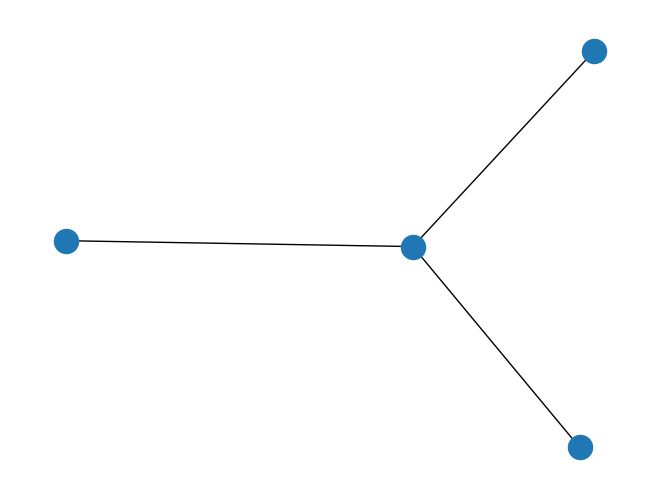

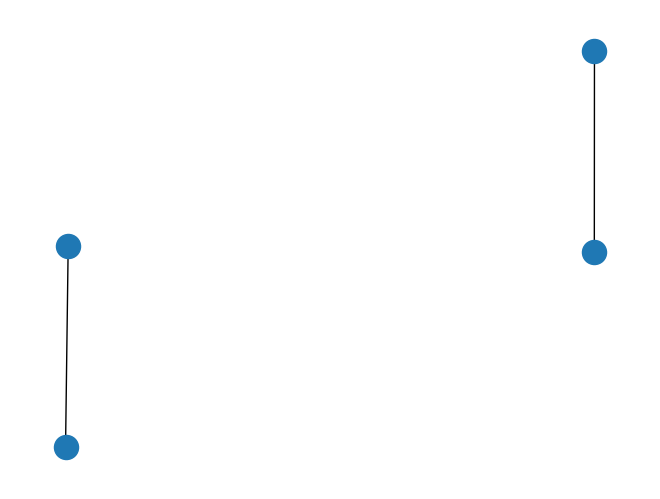

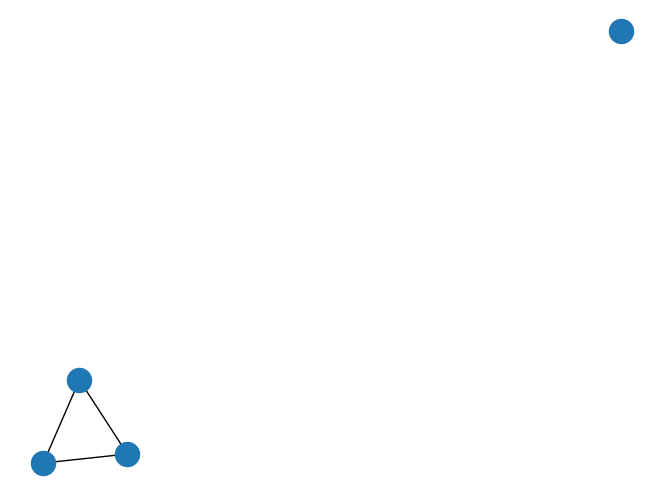

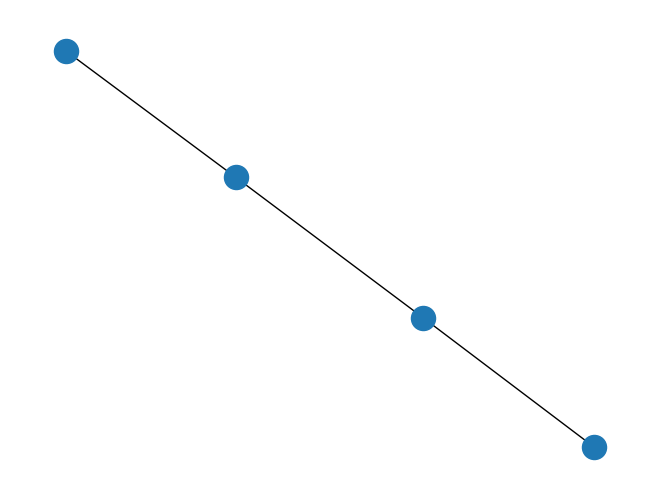

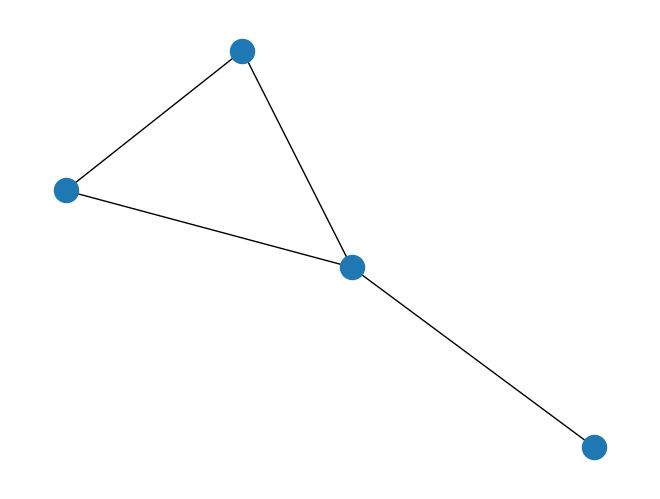

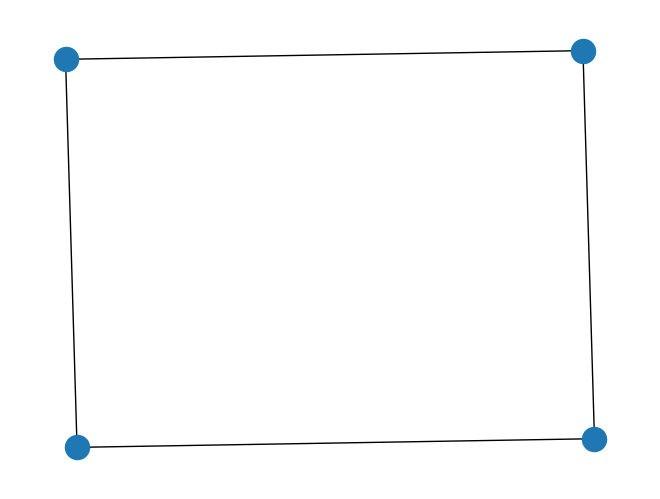

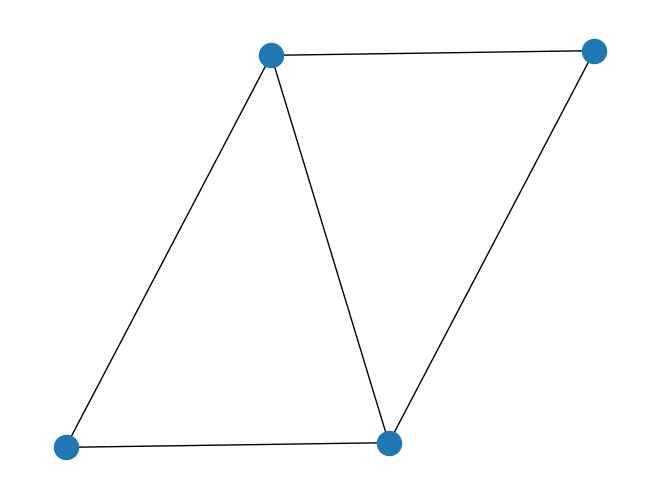

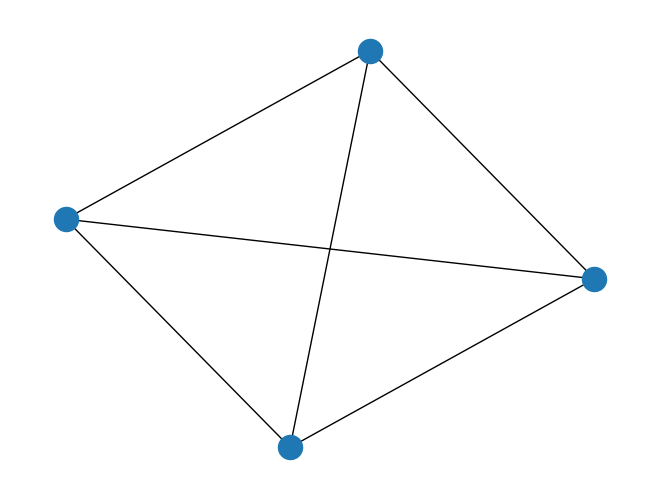

In [5]:
for i in range(len(G2)):
    plt.figure()
    nx.draw(G2[i])
    print(i)

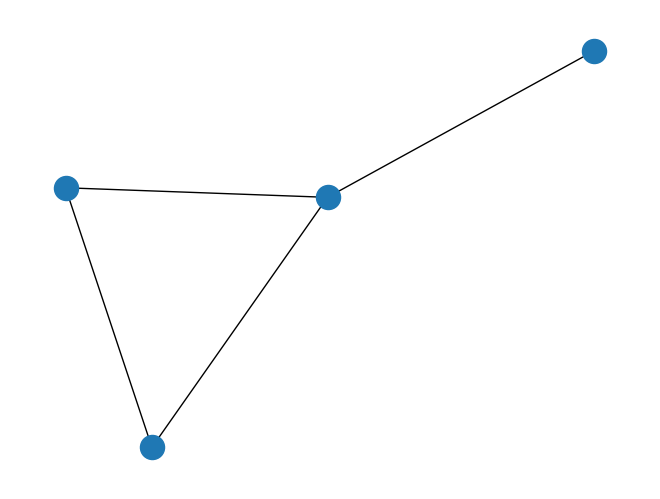

In [40]:
plt.figure()
nx.draw(G2[7])